<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/04_Transfer_Learning_Tensorflow_part_1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Trasnfer learning with Tensorflow - Feature Extraction

In [12]:
# Checking GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [13]:
# Get Data from Food 101

In [14]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip
zip_ext = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ext.extractall()
zip_ext.close()

--2021-06-22 05:20:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   161MB/s    in 1.0s    

2021-06-22 05:20:30 (161 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [15]:
# Countt of images

import os

for dirpath, dirnames ,filenames in  os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")




There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 10 directori

In [16]:
# Extracting name of classes
import pathlib
train_dir = "/content/10_food_classes_10_percent/train"

path_dir = pathlib.Path(train_dir)

class_names = sorted([item.name for item in path_dir.glob("*")])
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [17]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

Image Shape =  (512, 512, 3)


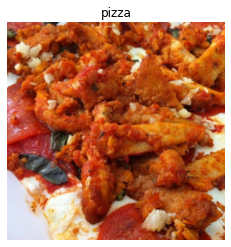

In [18]:
# Visualise Random Images
import matplotlib.pyplot as plt
import random

def check_random_image(directory,class_name  ):

  target_dir = directory+"/"+class_name

  images = os.listdir(target_dir)

  random_num = random.randint(0, len(images))

  img = plt.imread(target_dir+"/"+images[random_num])

  print("Image Shape = ", img.shape)

  plt.imshow(img)
  plt.axis(False)
  plt.title(class_name)



check_random_image(train_dir, class_name = random.choice(class_names))



In [19]:
## Creating data lmageDataLoaders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

print("Training Images:")
train_data = train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical",
                                              seed=42)
print("Test Images:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical",
                                             seed=42)

Training Images:
Found 750 images belonging to 10 classes.
Test Images:
Found 2500 images belonging to 10 classes.
